Scratch notebook for Nextcaller programming challenge, attempting to implement a 3-class classifier with logistic regression.

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import make_pipeline
import time

%matplotlib notebook

In [2]:
data = pd.read_table('Search_Data.txt')

In [8]:
data.head()

,ID,Feat 1,Feat 2,Feat 3,Feat 4,Label
0,1,10.526413,5.680796,1.661569,0.167528,Orange
1,2,15.023991,5.471672,0.897001,0.669878,Red
2,3,16.021447,-1.501333,1.902509,0.351208,Red
3,4,14.425902,6.429031,1.025405,0.528408,Aquamarine
4,5,11.547150,-4.699529,0.337308,0.011619,Red


In [4]:
X = data[['Feat 1','Feat 2','Feat 3','Feat 4']]
Y = data['Label']
Y[Y == 'Burnt Umber'] = 'Orange'

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
Y.value_counts(normalize = True)

Red           0.72
Aquamarine    0.22
Orange        0.06
Name: Label, dtype: float64

In [6]:
print(Y)

0          Orange
1             Red
2             Red
3      Aquamarine
4             Red
5             Red
6      Aquamarine
7             Red
8      Aquamarine
9      Aquamarine
10            Red
11     Aquamarine
12         Orange
13     Aquamarine
14            Red
15            Red
16            Red
17            Red
18            Red
19            Red
20            Red
21            Red
22            Red
23            Red
24         Orange
25            Red
26            Red
27            Red
28            Red
29     Aquamarine
          ...    
970        Orange
971        Orange
972    Aquamarine
973        Orange
974           Red
975           Red
976           Red
977           Red
978           Red
979           Red
980           Red
981        Orange
982           Red
983           Red
984           Red
985           Red
986           Red
987    Aquamarine
988    Aquamarine
989           Red
990        Orange
991    Aquamarine
992           Red
993           Red
994       

In [7]:
## scale data
standard_scaler = preprocessing.StandardScaler()
X_sc = standard_scaler.fit_transform(X)

In [8]:
X_sc.shape

(1000, 4)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, Y, test_size=0.3, random_state=0)
logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
pred = logreg.predict(X_test)
logreg.score(X_test,y_test)

0.74333333333333329

In [11]:
plt.pcolormesh(Z)

NameError: name 'Z' is not defined

<IPython.core.display.Javascript object>


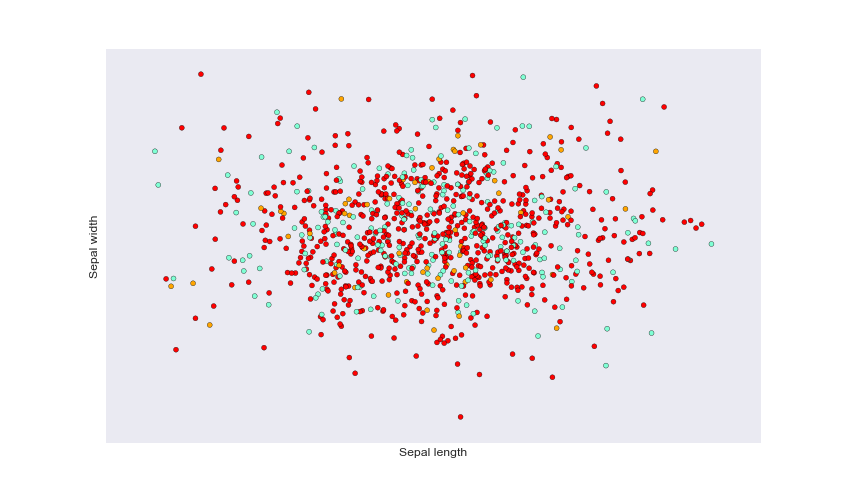

In [13]:
h = .02

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_sc[:,0].min() - .5, X_sc[:,0].max() + .5
y_min, y_max = X_sc[:,1].min() - .5, X_sc[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
zero_param = np.zeros(xx.shape)
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel(), zero_param.ravel(), zero_param.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
#plt.pcolormesh(xx, yy, Z)



Let's try to visualize the data pair by pair to see if any relations jump out

<IPython.core.display.Javascript object>


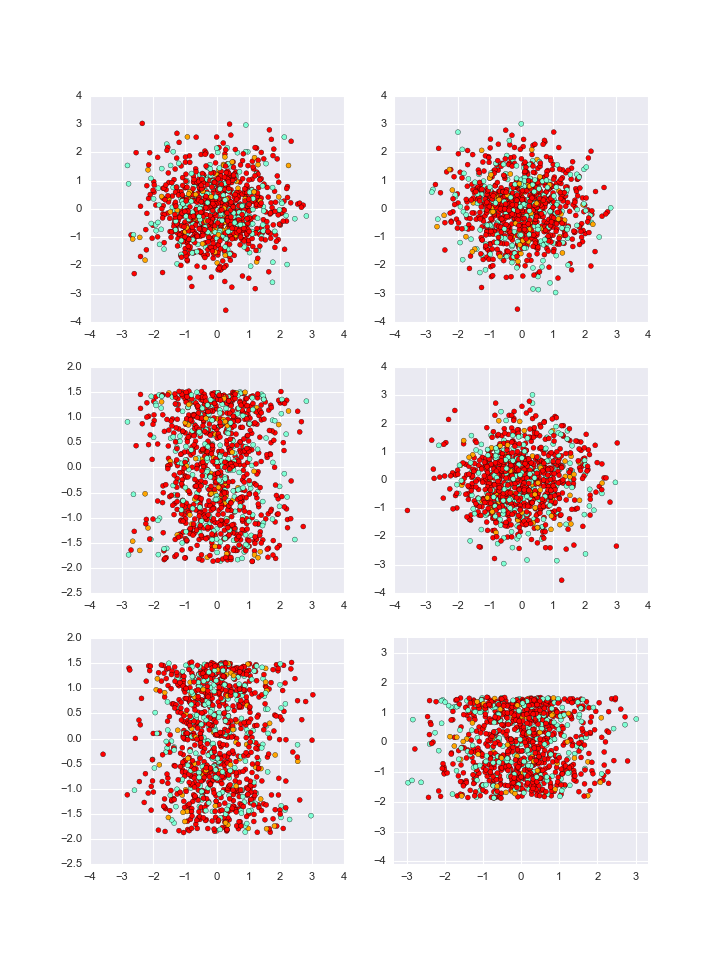

In [25]:
## create one big figure behind subpanels
fig, axes = plt.subplots(3,2,figsize=(9,12), facecolor='w')
pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]


## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for ax, pair in zip(axes.reshape(-1),pairs):
    
    # Plot also the training points
    ax.scatter(X_sc[:, pair[0]], X_sc[:, pair[1]], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    #plt.xlabel('Sepal length')
    #plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()

[['Feat 1', 'Feat 2'],
 ['Feat 1', 'Feat 2'],
 ['Feat 1', 'Feat 2'],
 ['Feat 3', 'Feat 4'],
 ['Feat 3', 'Feat 4'],
 ['Feat 3', 'Feat 4']]

Something weird clearly going on with variable 4 - otherwise, hard to really see too much.

Let's investigate further.

In [28]:
feats = [['Feat 1','Feat 2'],['Feat 3','Feat 4']]*3
print(feats)

[['Feat 1', 'Feat 2'], ['Feat 3', 'Feat 4'], ['Feat 1', 'Feat 2'], ['Feat 3', 'Feat 4'], ['Feat 1', 'Feat 2'], ['Feat 3', 'Feat 4']]


<IPython.core.display.Javascript object>


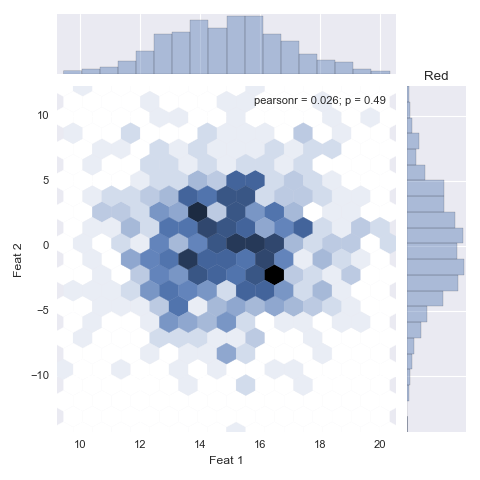

<IPython.core.display.Javascript object>


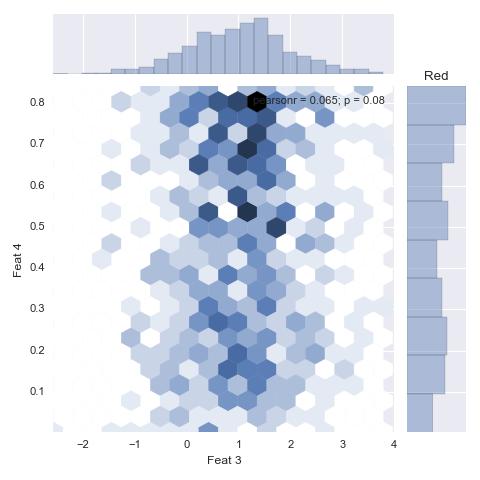

<IPython.core.display.Javascript object>


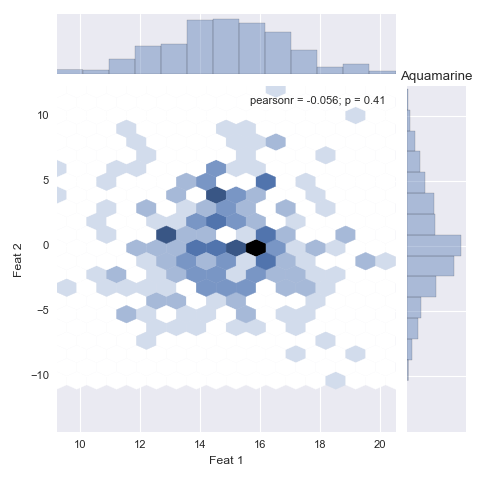

<IPython.core.display.Javascript object>


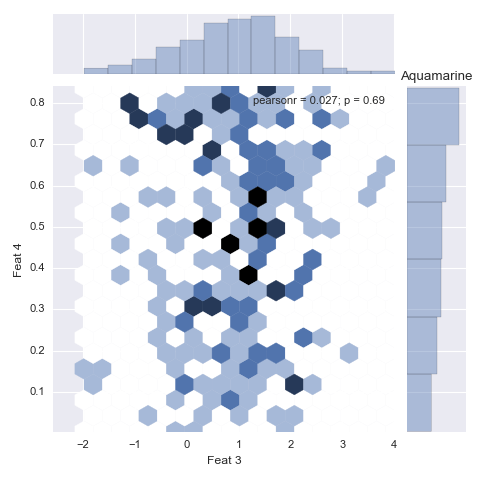

<IPython.core.display.Javascript object>


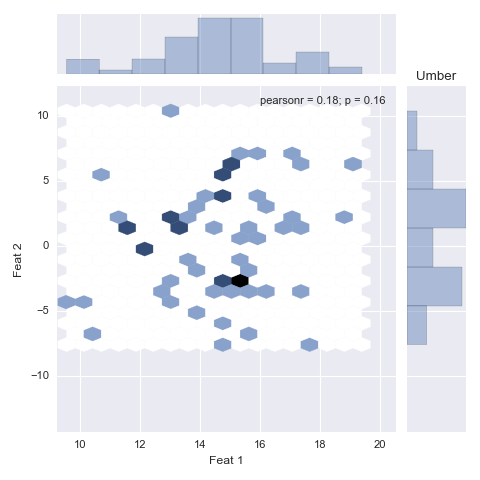

<IPython.core.display.Javascript object>


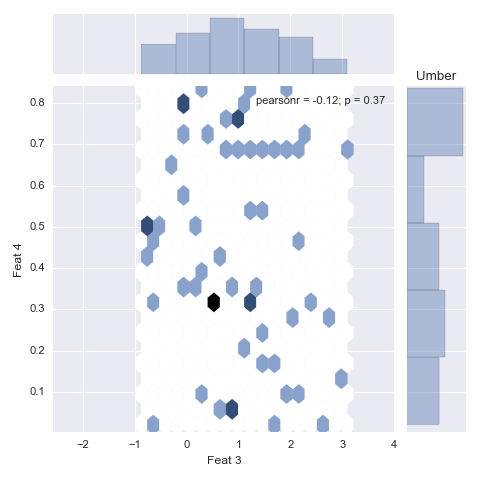

In [48]:
feats = [['Feat 1','Feat 2'],['Feat 3','Feat 4']]*3
df_red = data[data['Label'] == 'Red']
df_aqua = data[data['Label'] == 'Aquamarine']
df_umber = data[data['Label'] == 'Orange']
df_colors = [df_red,df_red,df_aqua,df_aqua,df_umber,df_umber]
colors = ['Red','Red','Aquamarine','Aquamarine','Umber','Umber']
xmin = [data['Feat 1'].min(),data['Feat 2'].min(),data['Feat 3'].min(),data['Feat 4'].min()]
xmax = [data['Feat 1'].max(),data['Feat 2'].max(),data['Feat 3'].max(),data['Feat 4'].max()]
xmin_plot = [xmin[0],xmin[2]]*3
ymin_plot = [xmin[1],xmin[3]]*3
xmax_plot = [xmax[0],xmax[2]]*3
ymax_plot = [xmax[1],xmax[3]]*3

## cycle through each numeric variable and logistic regress with cancellation (excluding cancellation itself)
for i in range(6):
    sns.jointplot(x=feats[i][0], y=feats[i][1], data=df_colors[i], kind = 'hex', \
                  gridsize = [17,11], xlim=[xmin_plot[i],xmax_plot[i]], ylim = [ymin_plot[i],ymax_plot[i]])
    plt.title(colors[i])

In [27]:
data.head()

,ID,Feat 1,Feat 2,Feat 3,Feat 4,Label
0,1,10.526413,5.680796,1.661569,0.167528,Orange
1,2,15.023991,5.471672,0.897001,0.669878,Red
2,3,16.021447,-1.501333,1.902509,0.351208,Red
3,4,14.425902,6.429031,1.025405,0.528408,Aquamarine
4,5,11.547150,-4.699529,0.337308,0.011619,Red


In [ ]:
Pipeline(steps=[('standardscaler',StandardScaler()),('gaussiannb', GaussianNB(priors=None))])